In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [8]:
#Open data of Stock Prices
diretorio_base = '/Users/romsiq/Downloads/CURSO_DATA_LIT/Machine Learning/prices_stock/'
arquivo = 'prices_stock.csv'

In [9]:
dados = pd.read_csv(diretorio_base+arquivo, delimiter=',')

In [10]:
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-13,19.549999,19.670000,19.350000,19.410000,19.410000,45800
1,2019-02-14,19.299999,19.500000,19.090000,19.129999,19.129999,89700
2,2019-02-15,19.200001,19.639999,19.180000,19.590000,19.590000,146000
3,2019-02-19,19.500000,19.600000,19.100000,19.549999,19.549999,138100
4,2019-02-20,19.660000,20.059999,19.520000,19.920000,19.920000,133400
5,2019-02-21,19.740000,20.790001,19.530001,20.190001,20.190001,167000
6,2019-02-22,20.389999,21.080000,20.379999,21.000000,21.000000,434100
7,2019-02-25,21.100000,21.340000,20.940001,21.170000,21.170000,145900
8,2019-02-26,21.170000,21.540001,21.040001,21.160000,21.160000,158600
9,2019-02-27,21.139999,21.290001,20.799999,20.980000,20.980000,77400


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date         20 non-null object
Open         20 non-null float64
High         20 non-null float64
Low          20 non-null float64
Close        20 non-null float64
Adj Close    20 non-null float64
Volume       20 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


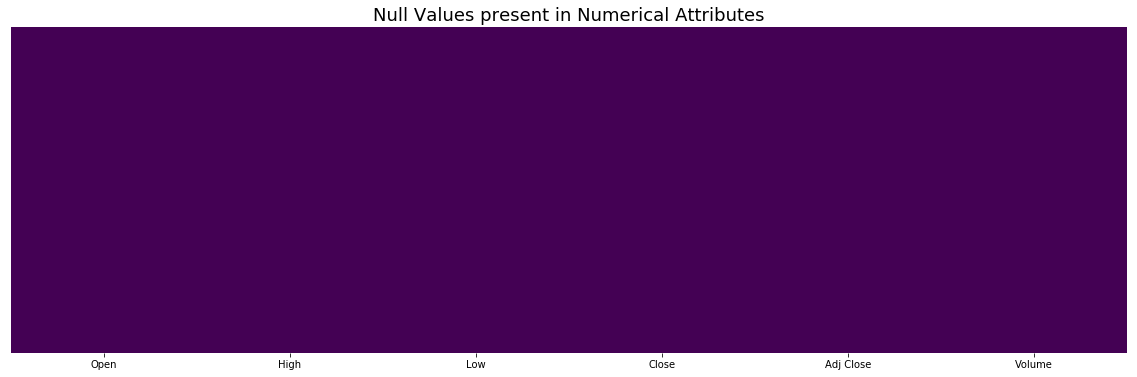

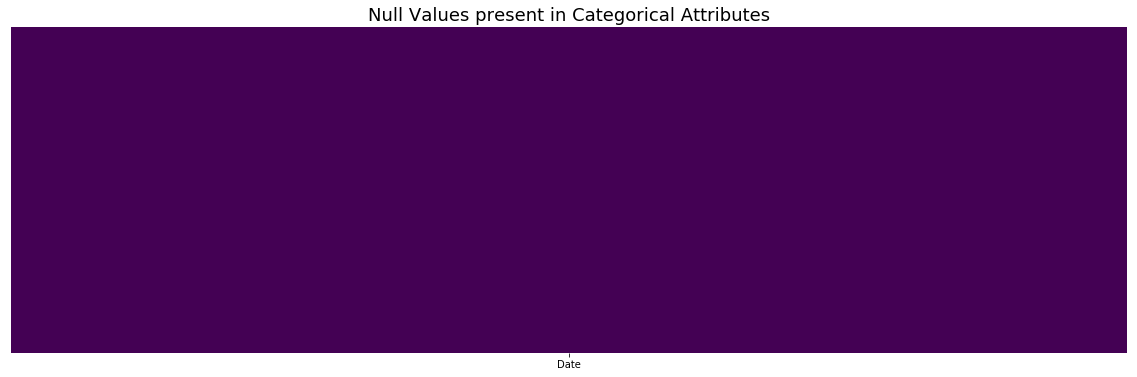

In [13]:
#Verify null datas

plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(exclude=['object']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Null Values present in Numerical Attributes',fontsize=18)
plt.show()

plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(exclude=['int64','float64']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Null Values present in Categorical Attributes',fontsize=18)
plt.show()

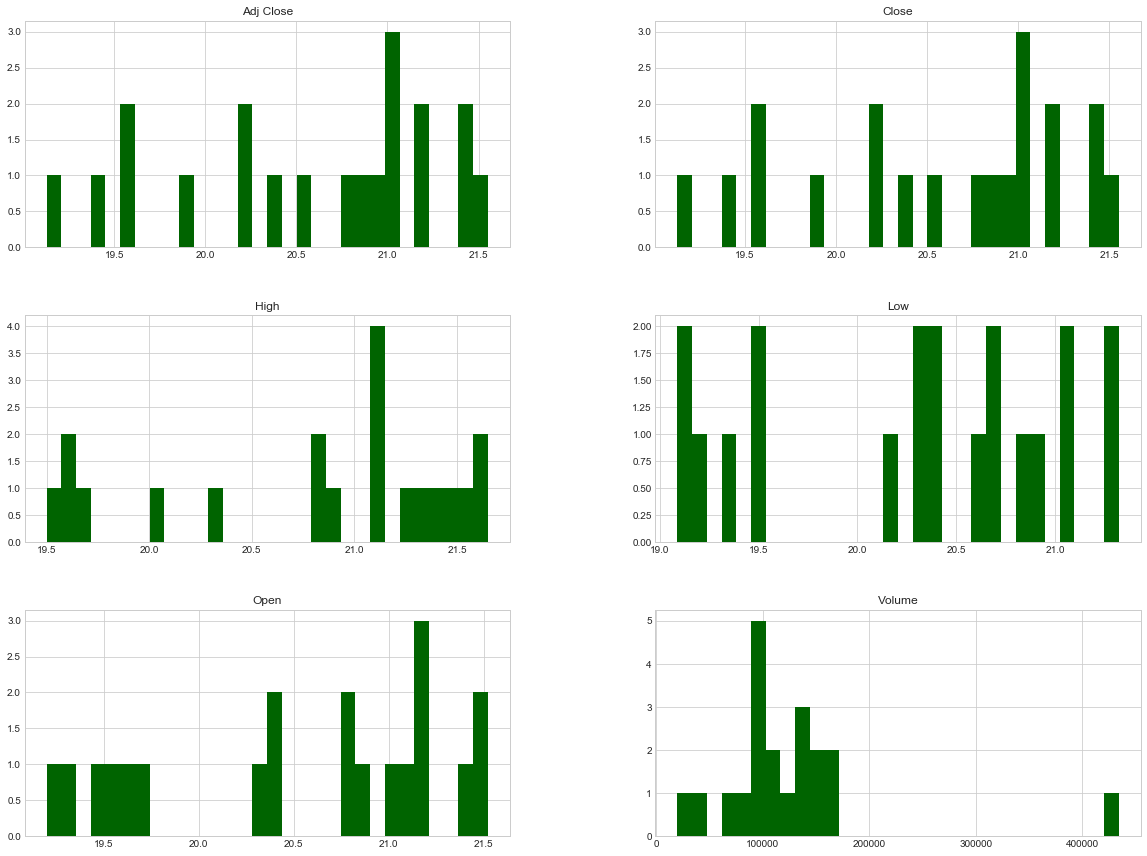

<Figure size 432x288 with 0 Axes>

In [15]:
#Exploratory data visualization

sns.set_style('whitegrid')
dados.hist(bins = 30, figsize = (20,15), color = 'darkgreen')
plt.show()
plt.tight_layout()

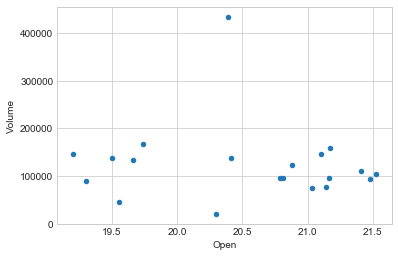

In [17]:
dados.plot.scatter(x='Open', y='Volume')

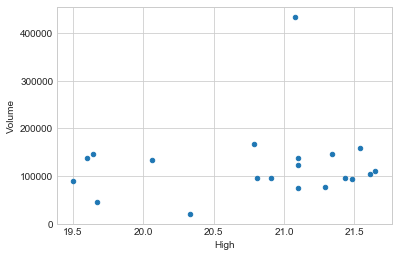

In [18]:
dados.plot.scatter(x='High', y='Volume')

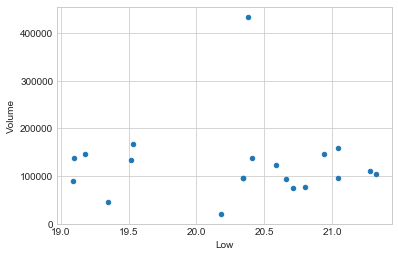

In [19]:
dados.plot.scatter(x='Low', y='Volume')

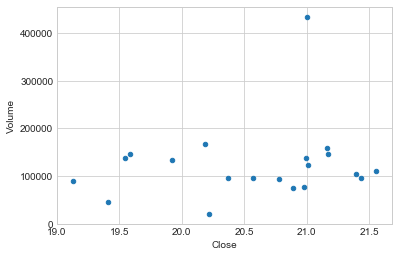

In [20]:
dados.plot.scatter(x='Close', y='Volume')

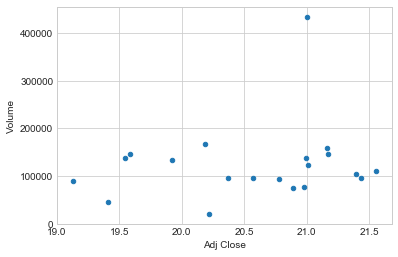

In [22]:
dados.plot.scatter(x='Adj Close', y='Volume')

In [28]:
corr_vol_open = dados.Volume.corr(dados.Open)
corr_vol_high = dados.Volume.corr(dados.High)
corr_vol_low = dados.Volume.corr(dados.Low)
corr_vol_close = dados.Volume.corr(dados.Close)

print('O valor de correlação entre as variáveis Volume e Open é: ' + str(100 * round(corr_vol_open, 4)) + '%')
print('O valor de correlação entre as variáveis Volume e High é: ' + str(100 * round(corr_vol_high, 4)) + '%')
print('O valor de correlação entre as variáveis Volume e Low é: ' + str(100 * round(corr_vol_low, 4)) + '%')
print('O valor de correlação entre as variáveis Volume e Close é: ' + str(100 * round(corr_vol_close, 4)) + '%')


O valor de correlação entre as variáveis Volume e Open é: -8.219999999999999%
O valor de correlação entre as variáveis Volume e High é: 13.530000000000001%
O valor de correlação entre as variáveis Volume e Low é: 0.13%
O valor de correlação entre as variáveis Volume e Close é: 17.79%


In [29]:
print("Vetor Y: Valores de Volume")
dados.Volume

Vetor Y: Valores de Volume


0      45800
1      89700
2     146000
3     138100
4     133400
5     167000
6     434100
7     145900
8     158600
9      77400
10    124400
11     95300
12    103900
13    110900
14     94700
15     95800
16    138000
17     74500
18     96100
19     20005
Name: Volume, dtype: int64

In [30]:
N = len(dados.Volume)
ones = pd.DataFrame(np.full(N, 1))
mat_X = pd.concat([ones, dados.High, dados.Close], axis = 1)

print("Matriz X: ")
mat_X

Matriz X: 


,0,High,Close
0,1,19.670000,19.410000
1,1,19.500000,19.129999
2,1,19.639999,19.590000
3,1,19.600000,19.549999
4,1,20.059999,19.920000
5,1,20.790001,20.190001
6,1,21.080000,21.000000
7,1,21.340000,21.170000
8,1,21.540001,21.160000
9,1,21.290001,20.980000


In [31]:
print('Matriz X Transposta:')
mat_X.T

Matriz X Transposta:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.000000,1.000000,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000
High,19.67,19.500000,19.639999,19.600000,20.059999,20.790001,21.08,21.34,21.540001,21.290001,21.10,21.43,21.610001,21.650000,21.480000,20.809999,21.10,21.100000,20.910000,20.330000
Close,19.41,19.129999,19.590000,19.549999,19.920000,20.190001,21.00,21.17,21.160000,20.980000,21.01,21.43,21.389999,21.549999,20.780001,20.570000,20.99,20.889999,20.370001,20.219999


In [32]:
from numpy.linalg import inv

X = mat_X.values
Xt = mat_X.T.values

In [33]:
# Xt * X
XXt = np.matmul(Xt, X)

# Inverte o resultado de Xt * X
XXt_inv = inv(XXt)

# Obtem o vetor Y de saídas
Y = dados.Volume.values

# Calcula o valor do vetor b de parâmetros
beta = np.matmul(np.matmul(XXt_inv, Xt), Y)

# Transformando vetor em Coluna
parametros = pd.DataFrame({'Parametros': beta})
parametros

,Parametros
0,-235606.945215
1,-58087.138503
2,76264.858796


In [34]:
def previsão_linear_multi(x1, x2, par):
    return par[0] + x1*par[1] + x2*par[2]

In [35]:
y_modelo = previsão_linear_multi(dados.High, dados.Close, beta)
y_modelo

0     102119.949651
1      90640.526469
2     117590.296477
3     116863.053313
4     118361.101708
5      96548.962566
6     141478.209847
7     139340.579831
8     126960.445456
9     127754.555498
10    141079.115665
11    153941.600653
12    140435.187019
13    150314.136973
14    101465.161775
15    124367.906048
16    139553.818489
17    131927.256344
18    103306.238616
19    125556.897599
dtype: float64

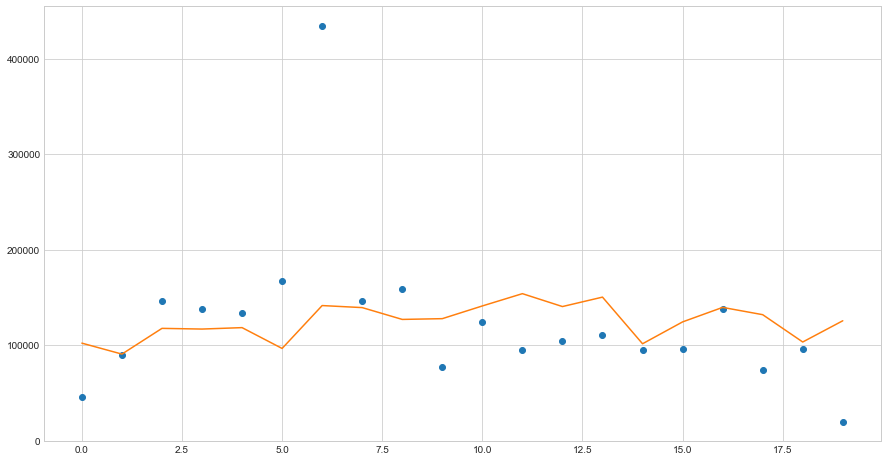

In [37]:
y_real = dados.Volume.copy()

plt.figure(figsize=(15,8))
plt.plot(y_real, 'o',
         y_modelo, '-')
plt.show()